In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [19]:
url = '../raw_data/age_gender.csv'
df = pd.read_csv(url)

In [20]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(),dtype='float32'))

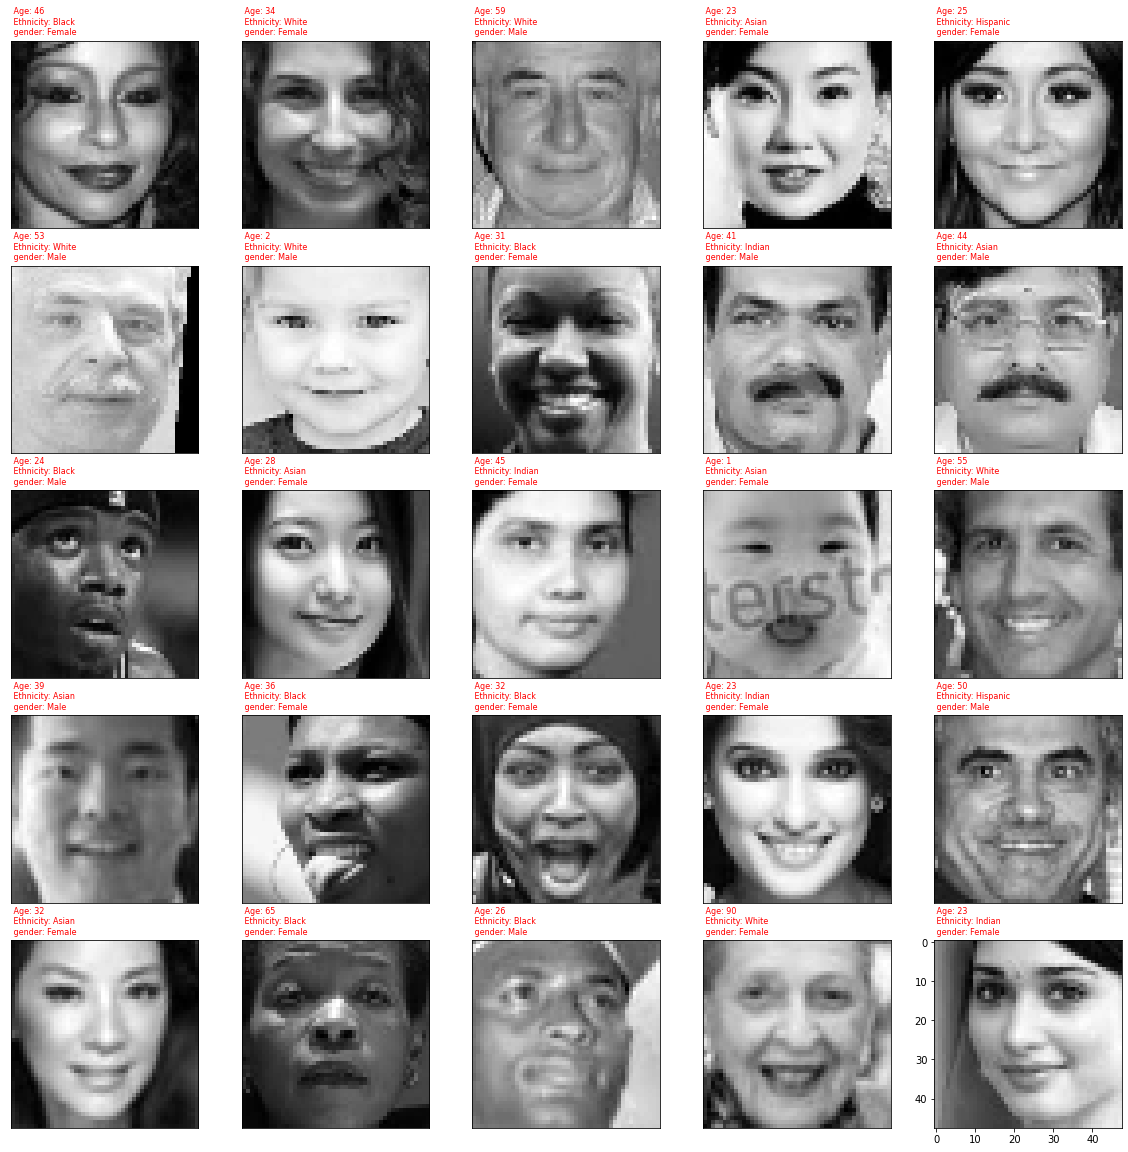

In [9]:
plt.figure(figsize=(20, 20))

for i in range(25):  
    index = np.random.randint(0, len(df))
    plt.xticks([])
    plt.yticks([])   
    plt.grid(False)
    plt.subplot(5, 5, i+1)
    plt.imshow(df['pixels'].iloc[index].reshape(48, 48),"gray")
    plt.title(' Age: {}\n Ethnicity: {}\n gender: {}'.format(df['age'].iloc[index], {0:"White", 1:"Black", 2:"Asian", 3:"Indian/Hispanic", 4:"Indian/Hispanic"}[df['ethnicity'].iloc[index]], {0:"Male", 1:"Female"}[df['gender'].iloc[index]]),loc="left",color='red',fontsize = 8)

plt.show()

In [22]:
df['pixels'] = df['pixels'].apply(lambda x: np.reshape(np.array(x.tolist()), (-1, 48, 48,1)))

In [13]:
model_age_cat = joblib.load("../models/age_model_cat.joblib")
model_age_5_19 = joblib.load("../models/age_model_5_19.joblib")
model_age_20_49 = joblib.load("../models/age_model_20_49.joblib")
model_age_50_80 = joblib.load("../models/age_model_50_80.joblib")
model_ethnicity = joblib.load("../models/ethnicity_model.joblib")
model_gender = joblib.load("../models/gender_model.joblib")

In [ ]:
# Ethnicity labels
ETHNICITIES = {
    0: "White",
    1: "Black",
    2: "Asian",
    3: "Indian/Hispanic",
    4: "Hispanic"
}

# Gender labels
GENDERS = {
    0: "Male",
    1: "Female"
}

# Age labels
AGES= {
    0: model_age_5_19,
    1: model_age_20_49,
    2: model_age_50_80,
    3: "60_80",
}

# Age linear model MAE
AGES_MAE= {
    0: 2,
    1: 4,
    2: 6,
    3: 0,
}

In [25]:
df_sample = df.sample(9)
df_sample.head()

,age,ethnicity,gender,img_name,pixels
9456,28,0,0,20170117120938226.jpg.chip.jpg,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [..."
8955,27,2,0,20170104192852607.jpg.chip.jpg,"[[[[8.], [11.], [16.], [31.], [56.], [79.], [6..."
911,1,0,1,20170109191640395.jpg.chip.jpg,"[[[[198.], [202.], [213.], [211.], [212.], [21..."
6864,26,3,1,20170104222736351.jpg.chip.jpg,"[[[[29.], [19.], [12.], [10.], [10.], [11.], [..."
319,1,2,0,20161219202914180.jpg.chip.jpg,"[[[[60.], [94.], [108.], [122.], [125.], [125...."


In [32]:
df_sample['ethnicity_pred']=df_sample['pixels'].apply(lambda x: np.argmax(model_ethnicity.predict(x)[0]))
df_sample['gender_pred']=df_sample['pixels'].apply(lambda x: np.round(model_gender.predict(x)[0][0]))
df_sample['age_cat_pred']=df_sample['pixels'].apply(lambda x: np.argmax(model_age_cat.predict(x)[0]))

In [49]:
def age_prediction(array):
    array=array/255
    if np.argmax(model_age_cat.predict(array)[0])==0:
        return np.round(model_age_5_19.predict(array)[0][0])
    if np.argmax(model_age_cat.predict(array)[0])==1:
        return np.round(model_age_20_49.predict(array)[0][0])
    if np.argmax(model_age_cat.predict(array)[0])==2:
        return np.round(model_age_50_80.predict(array)[0][0])

In [50]:
df_sample['age_pred']=df_sample['pixels'].apply(age_prediction)
df_sample

,age,ethnicity,gender,img_name,pixels,ethnicity_pred,gender_pred,age_cat_pred,age_pred
9456,28,0,0,20170117120938226.jpg.chip.jpg,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [...",1,0.0,1,37.0
8955,27,2,0,20170104192852607.jpg.chip.jpg,"[[[[8.], [11.], [16.], [31.], [56.], [79.], [6...",0,0.0,1,35.0
911,1,0,1,20170109191640395.jpg.chip.jpg,"[[[[198.], [202.], [213.], [211.], [212.], [21...",0,1.0,0,11.0
6864,26,3,1,20170104222736351.jpg.chip.jpg,"[[[[29.], [19.], [12.], [10.], [10.], [11.], [...",3,0.0,1,26.0
319,1,2,0,20161219202914180.jpg.chip.jpg,"[[[[60.], [94.], [108.], [122.], [125.], [125....",2,0.0,0,10.0
21093,63,3,1,20170109134308184.jpg.chip.jpg,"[[[[150.], [150.], [151.], [146.], [144.], [13...",3,1.0,2,58.0
6988,26,3,1,20170117174106166.jpg.chip.jpg,"[[[[15.], [16.], [16.], [16.], [15.], [22.], [...",0,1.0,1,21.0
16365,42,0,0,20170105173002786.jpg.chip.jpg,"[[[[52.], [40.], [62.], [44.], [81.], [131.], ...",0,0.0,1,41.0
14202,36,0,0,20170104201153985.jpg.chip.jpg,"[[[[38.], [47.], [52.], [55.], [61.], [67.], [...",0,0.0,1,33.0
